### Import necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


### Create a visualisation of the dependent and independent variables

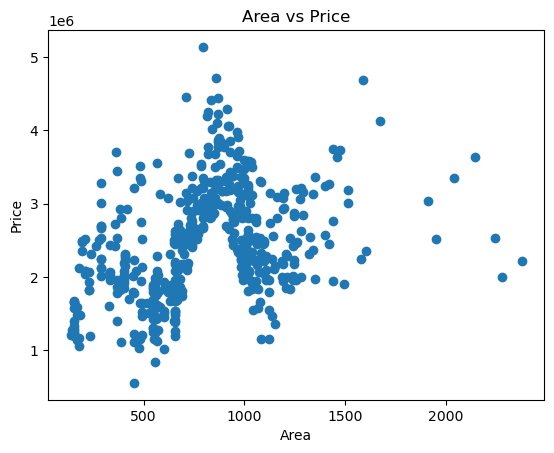

In [3]:
X = df['LotArea']
y= df['SalePrice']

plt.scatter(X, y)
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

### Preprocessing by feature scaling

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(np.array(df))
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,LotArea,SalePrice
0,-1.842419,-1.640330
1,-1.822774,-1.548247
2,-1.803130,-1.023378
3,-1.803130,-1.603497
4,-1.803130,-1.651379
...,...,...
495,3.489710,1.177390
496,3.789993,1.564136
497,4.065019,0.109235
498,4.171662,-0.590591


### Split the data into training and test data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_scaled = df_scaled[['LotArea']]
y_scaled = df_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42)

### LinearRegression

In [8]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()

In [9]:
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [10]:
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
print("Linear Regression MSE:", mean_squared_error(y_test, predictions))
print("Linear Regression MSE:", r2_score(y_test, predictions))

Linear Regression MSE: 0.9800426717124742
Linear Regression MSE: 0.11647545040727958


### Lasso Regression

In [12]:
from sklearn.linear_model import Lasso

In [13]:
ls = Lasso()
ls.fit(X_train, y_train)
predictions = ls.predict(X_test)

print("Lasso MSE:", mean_squared_error(y_test, predictions))
print("Lasso MSE:", r2_score(y_test, predictions))

Lasso MSE: 1.1120197138682022
Lasso MSE: -0.002504018643256556


### Decision Tree Regression

In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X_train, y_train)
predictions = tree.predict(X_test)

print("Decision Tree MSE:", mean_squared_error(y_test, predictions))
print("Decision Tree MSE:",r2_score(y_test, predictions))

Decision Tree MSE: 0.6771938350596638
Decision Tree MSE: 0.38949864594917216


### Bagging Regressor

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Instantaite the decision tree as the base model
d_tree = DecisionTreeRegressor(max_depth = 4)

# Instantiate bagging regressor with decision tree as the base model
bag_reg = BaggingRegressor (estimator = d_tree)

In [18]:
bag_reg.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4))

In [19]:
predictions = bag_reg.predict(X_test)

print("Bagging Regressor r_squared:", r2_score(y_test, predictions))
print("Bagging Regressor RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

Bagging Regressor r_squared: 0.43112257966098944
Bagging Regressor RMSE: 0.7943694438374612


### Adaboost Regressor

In [20]:
from sklearn.ensemble import AdaBoostRegressor

In [21]:
d_tree = DecisionTreeRegressor(max_depth = 3)
boost_reg = AdaBoostRegressor(estimator = d_tree)

In [22]:
boost_reg.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3))

In [23]:
predictions = boost_reg.predict(X_test)

print("Ada Boost Regresor r_squared:", r2_score(y_test, predictions))
print("Ada Boost Regresor RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

Ada Boost Regresor r_squared: 0.3985426292241183
Ada Boost Regresor RMSE: 0.8167997720369282


### Voting Regressor

In [24]:
from sklearn.ensemble import VotingRegressor

In [25]:
models = [("LR", lr), ("DT", tree), ("Lasso", ls)]
model_weightings = np.array([0.1, 0.3, 0.5])
v_reg = VotingRegressor(estimators = models, weights = model_weightings)

In [26]:
v_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('DT', DecisionTreeRegressor(max_depth=2)),
                            ('Lasso', Lasso())],
                weights=array([0.1, 0.3, 0.5]))

In [27]:
v_reg.predict(X_test)

print("Voting Regressor r_squared:", r2_score(y_test, predictions))
print("Voting Regressor RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

Voting Regressor r_squared: 0.3985426292241183
Voting Regressor RMSE: 0.8167997720369282


### Stacking Regressor

In [28]:
from sklearn.ensemble import StackingRegressor

In [29]:
models = [("LR", lr), ("DT", tree), ("Lasso", ls)]
meta_learner_reg = LinearRegression()
s_reg = StackingRegressor(estimators = models, final_estimator = meta_learner_reg)

In [30]:
s_reg.fit(X_train, y_train)

StackingRegressor(estimators=[('LR', LinearRegression()),
                              ('DT', DecisionTreeRegressor(max_depth=2)),
                              ('Lasso', Lasso())],
                  final_estimator=LinearRegression())

In [31]:
predictions = s_reg.predict(X_test)

print("Stacking Regressor r_squared:", r2_score(y_test, predictions))
print("Stacking Regressor RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

Stacking Regressor r_squared: 0.3787601116088235
Stacking Regressor RMSE: 0.8301237678733512


### Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
forest_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [35]:
forest_model.predict(X_test)

print("Random ForestRegressor r_squared:", r2_score(y_test, predictions))
print("Random Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test, predictions)))

Random ForestRegressor r_squared: 0.3787601116088235
Random Forest Regressor RMSE: 0.8301237678733512
